In [1]:
!nvidia-smi

Sat Nov  2 10:28:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 37.71 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.8 MB/s eta 0:00:00


In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00


In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [6]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Nov  2 10:30 .
drwxr-xr-x 1 root root      4096 Nov  2 10:29 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [7]:
%cd {HOME}/yolov9

/content/yolov9


In [8]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("arvind-kumar-wjygd").project("anpr2-syxl7")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ANPR2-8 in yolov9:: 100%|██████████| 626/626 [00:00<00:00, 7453.89it/s]


In [10]:
%cd {HOME}/yolov9
!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml \
--project {HOME}/yolov9/runs/train/ \
--name exp_with_logs


/content/yolov9
2024-11-02 10:35:41.928597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 10:35:41.947751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 10:35:41.953494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 10:35:41.967414: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 10:35:43.216532: W

In [15]:
!ls {HOME}/yolov9/runs/train/exp_with_logs/

events.out.tfevents.1730543596.d80676233598.1903.0  hyp.yaml  opt.yaml	weights


Checking /content/yolov9/runs/train/exp_with_logs...
Checking /content/yolov9/runs/train/exp_with_logs2...
Found results.png in /content/yolov9/runs/train/exp_with_logs2


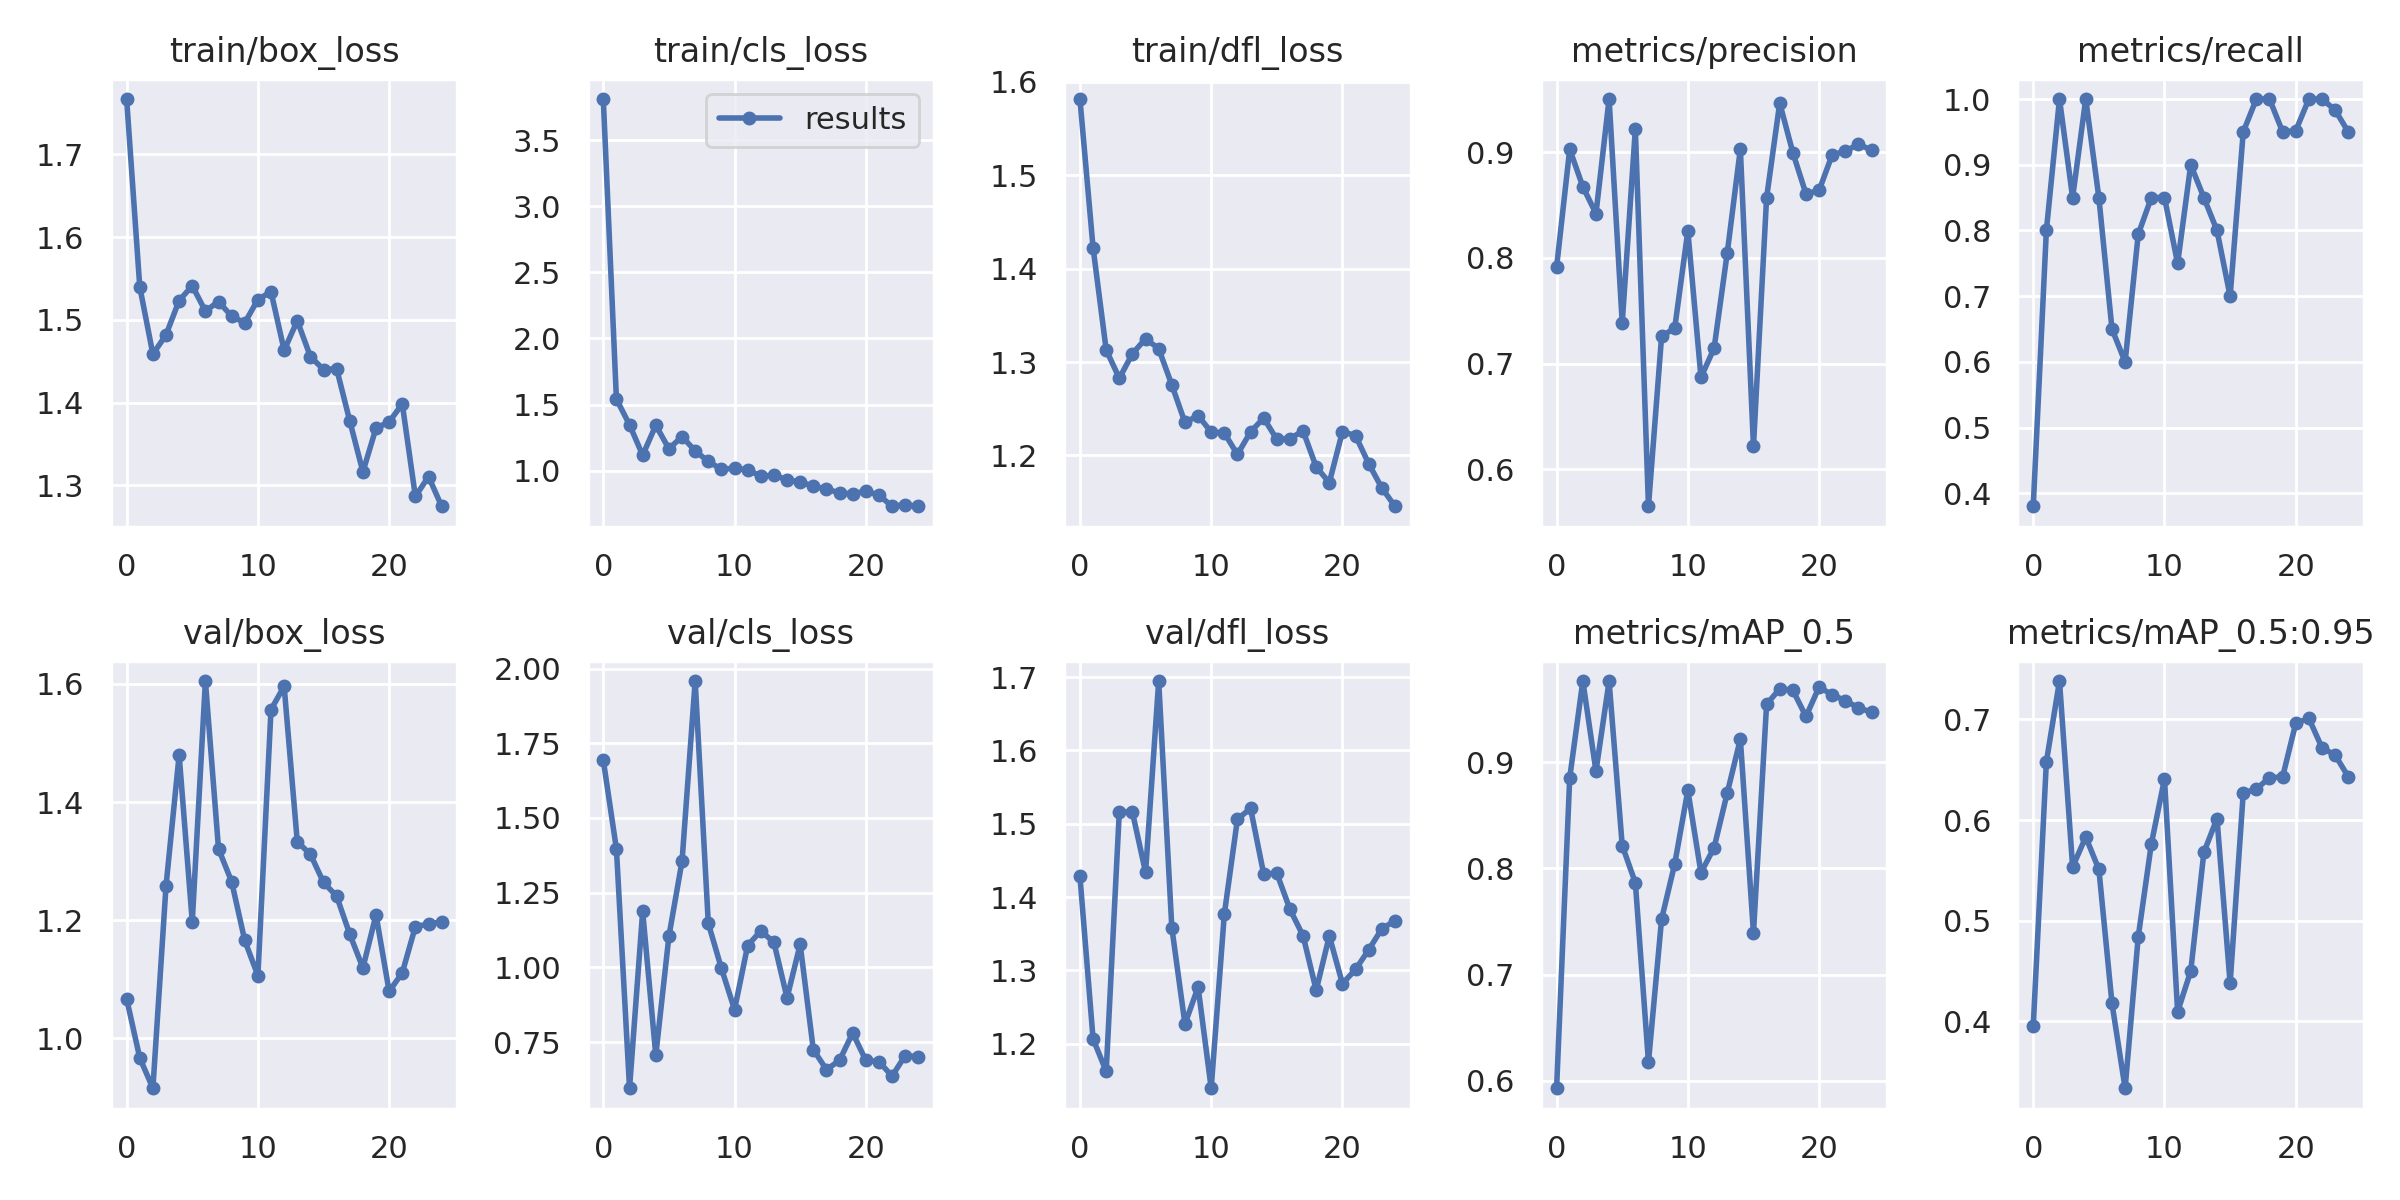

In [19]:
import os
import glob
from IPython.display import Image, display  # Import Image and display

HOME = "/content"  # or your specified path
exp_dirs = sorted(glob.glob(f"{HOME}/yolov9/runs/train/exp_with_logs*"), key=os.path.getmtime)

for exp_dir in exp_dirs:
    print(f"Checking {exp_dir}...")
    if os.path.isfile(os.path.join(exp_dir, "results.png")):
        print(f"Found results.png in {exp_dir}")
        display(Image(filename=os.path.join(exp_dir, "results.png"), width=1000))
        break
else:
    print("results.png not found in any experiment folder.")


In [20]:
import os

HOME = "/content"  # or your specified path
for folder in os.listdir(f"{HOME}/yolov9/runs/train"):
    print(folder)

exp_with_logs
exp_with_logs2


Found confusion_matrix.png at: /content/yolov9/runs/train/exp_with_logs2/confusion_matrix.png


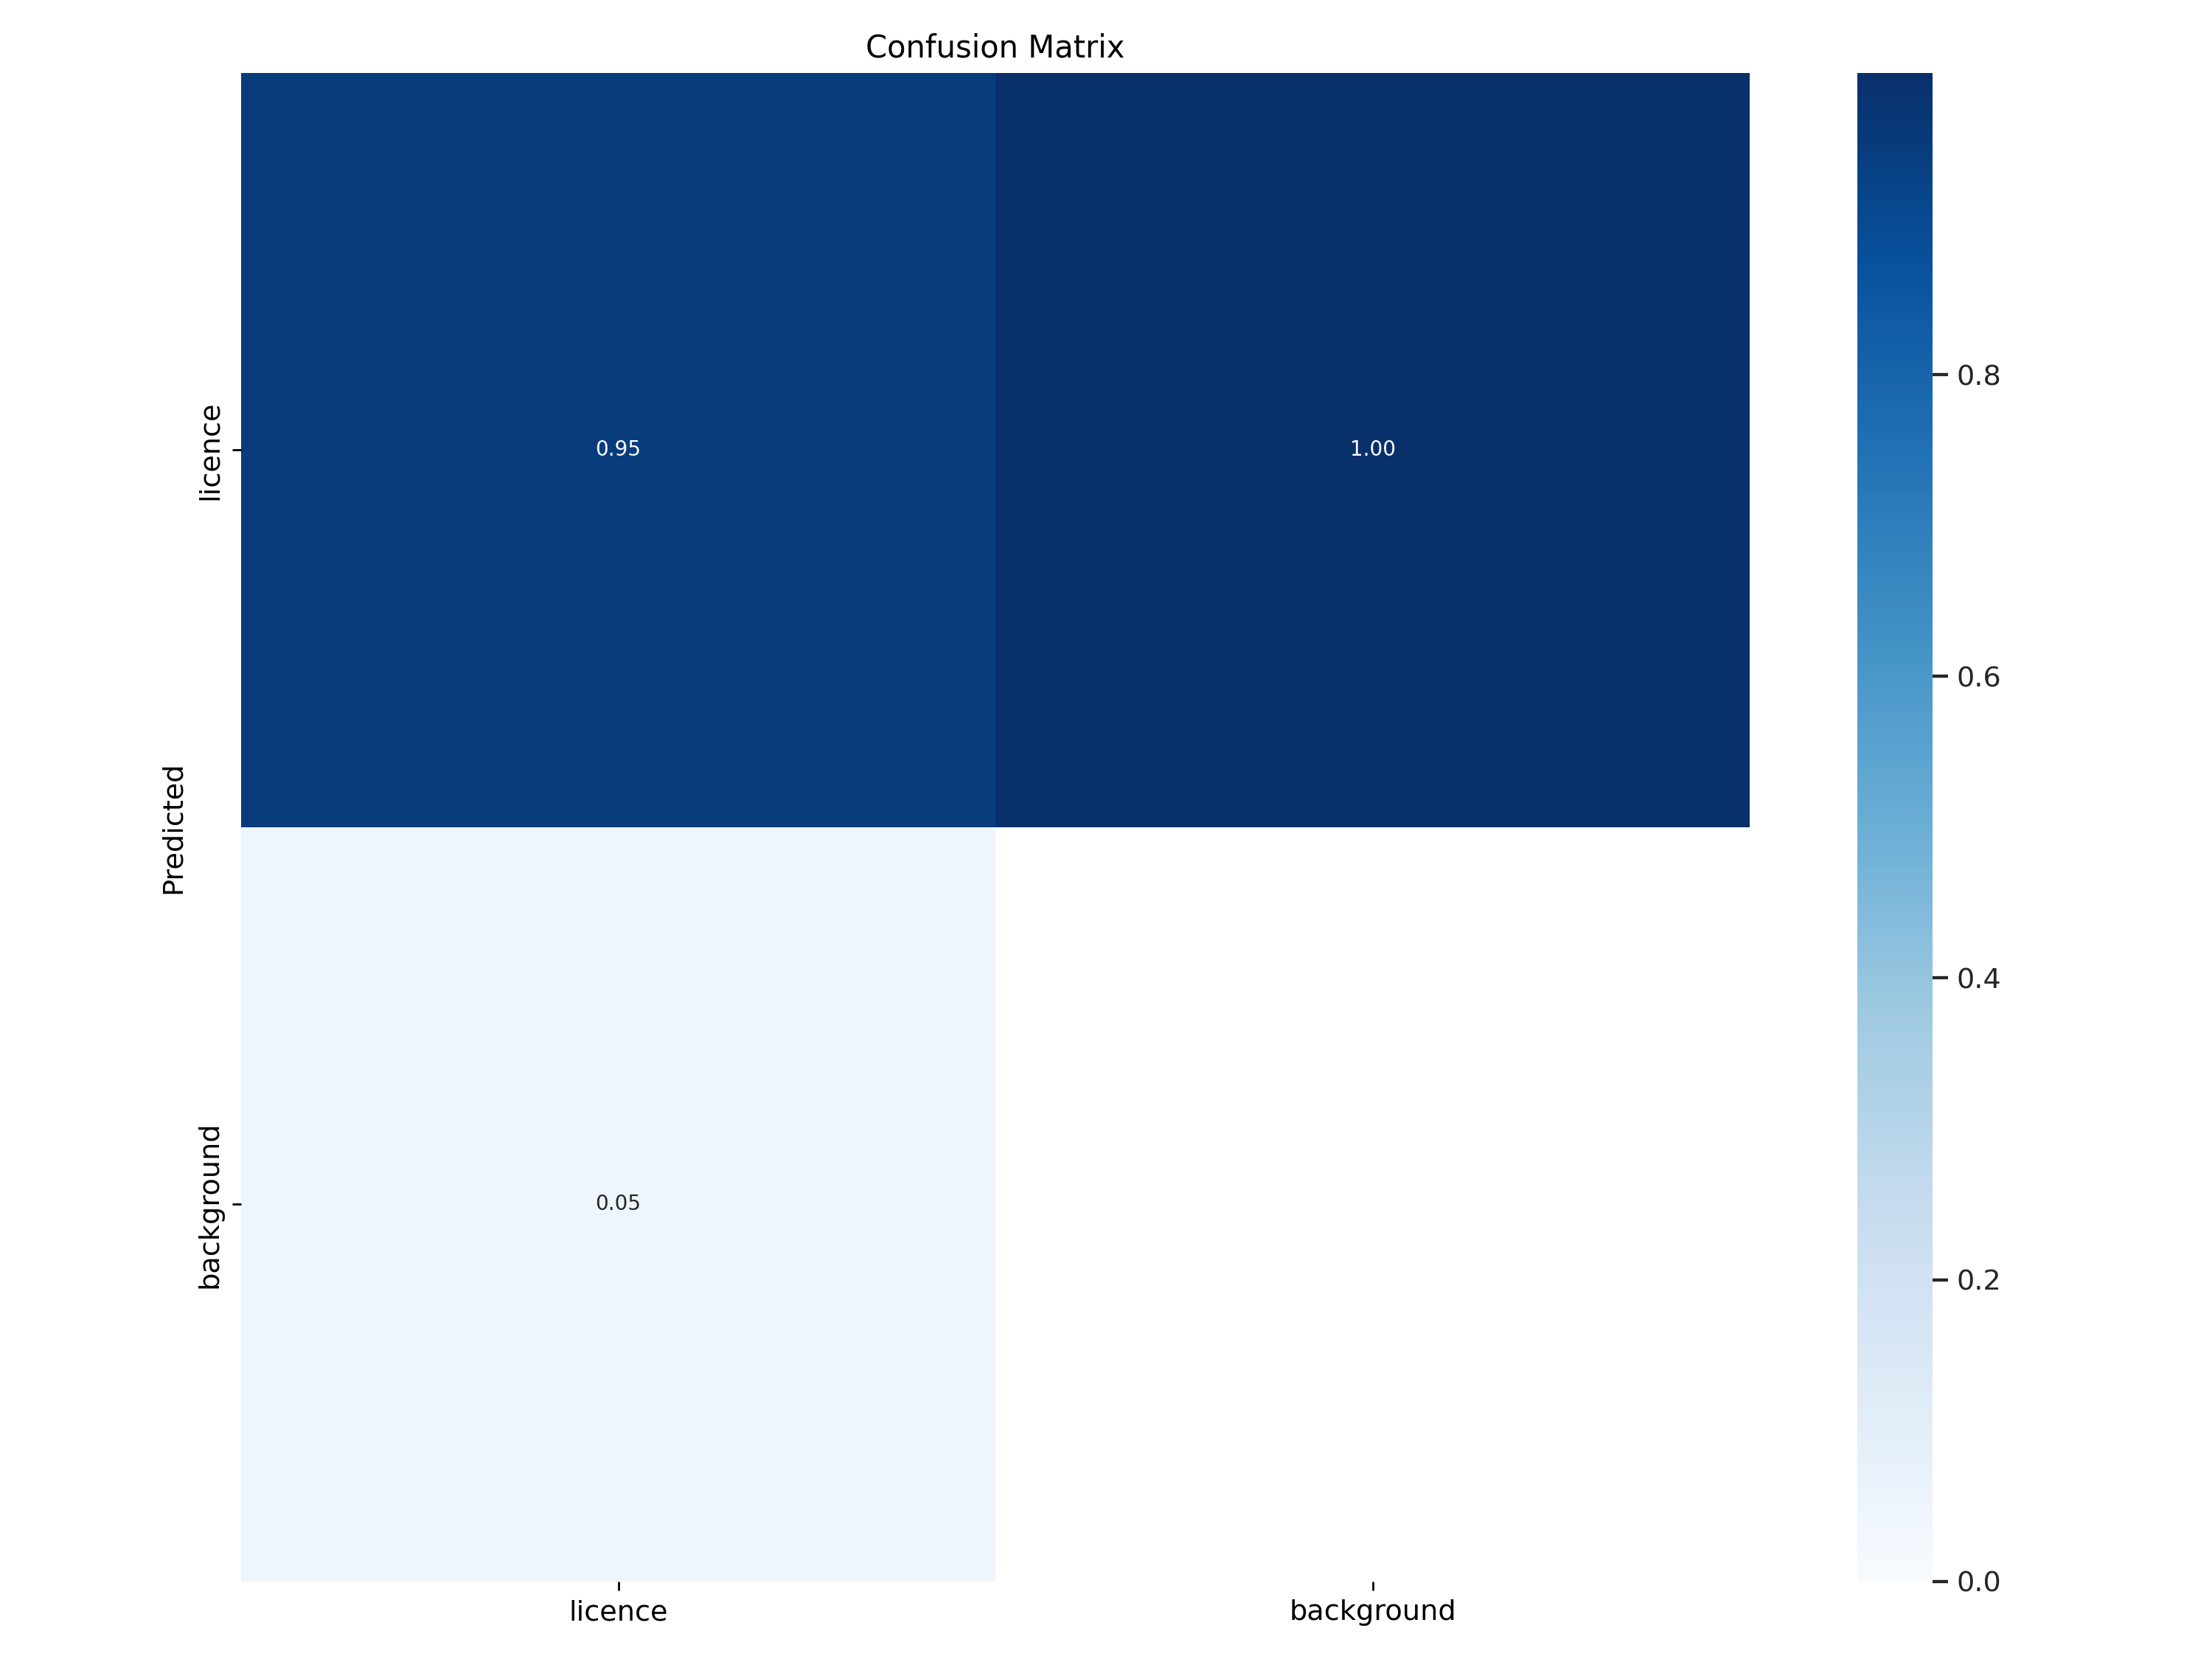

In [23]:
import glob

confusion_matrix_paths = glob.glob(f"{HOME}/yolov9/runs/train/exp*/confusion_matrix.png")
if confusion_matrix_paths:
    for path in confusion_matrix_paths:
        print(f"Found confusion_matrix.png at: {path}")
        display(Image(filename=path, width=1000))
else:
    print("confusion_matrix.png not found in any experiment folder.")


In [24]:
import os

HOME = "/content"  # or your specified path
exp_folder = f"{HOME}/yolov9/runs/train/exp_with_logs2"

# List all files in the specified folder
if os.path.exists(exp_folder):
    print("Files in exp_with-logs2:")
    print(os.listdir(exp_folder))
else:
    print("exp2 folder does not exist.")


Files in exp_with-logs2:
['F1_curve.png', 'weights', 'PR_curve.png', 'R_curve.png', 'labels.jpg', 'events.out.tfevents.1730543775.d80676233598.2703.0', 'labels_correlogram.jpg', 'results.png', 'P_curve.png', 'opt.yaml', 'hyp.yaml', 'results.csv', 'confusion_matrix.png']


In [25]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml \
--project {HOME}/yolov9/runs/train/ \
--name custom_exp_name  # or another appropriate name


/content/yolov9
2024-11-02 10:55:15.299763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 10:55:15.319368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 10:55:15.325572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 10:55:15.340253: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 10:55:16.551488: W

In [27]:
import os
from IPython.display import Image, display

# Define the path to your images directory
images_path = f"{HOME}/content/yolov9/ANPR2-8/valid/images"

# Specify the image file you want to display
image_file = 'download_jpeg.rf.d07c4fafa40947367f42eb003673dfd3.jpg'  # Use the exact name from the printed list
image_path = os.path.join(images_path, image_file)

# Check the directory and file
if os.path.exists(images_path):
    print("Directory exists:", images_path)
    print("Images in the directory:")
    for img in os.listdir(images_path):
        print(f" - {img}")

    # Display the image if it exists
    print("Attempting to access image at path:", image_path)
    if os.path.exists(image_path):
        display(Image(filename=image_path, width=1000))
    else:
        print(f"The image file {image_file} does not exist at the path: {image_path}")
else:
    print("The specified directory does not exist.")


The specified directory does not exist.


In [29]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp_with_logs2/weights/best.pt

/content/yolov9
val: data=/content/yolov9/ANPR2-8/data.yaml, weights=['/content/yolov9/runs/train/exp_with_logs2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the 

In [32]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp_with_logs2/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp_with_logs2/weights/best.pt'], source=/content/yolov9/ANPR2-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future 

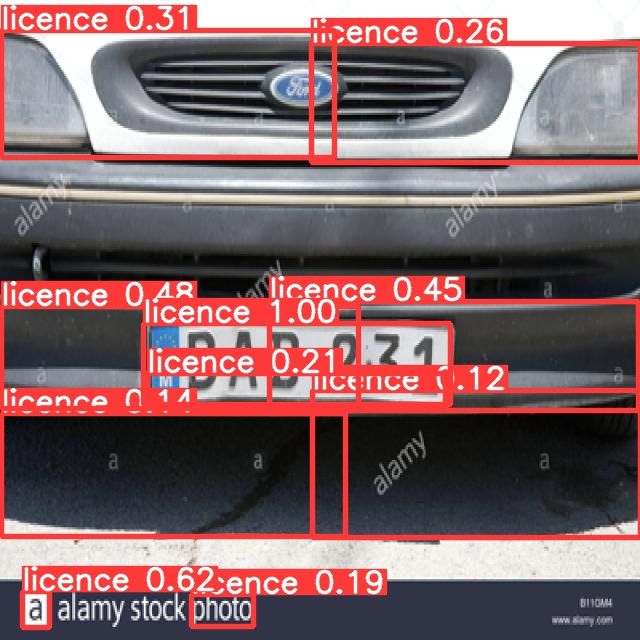

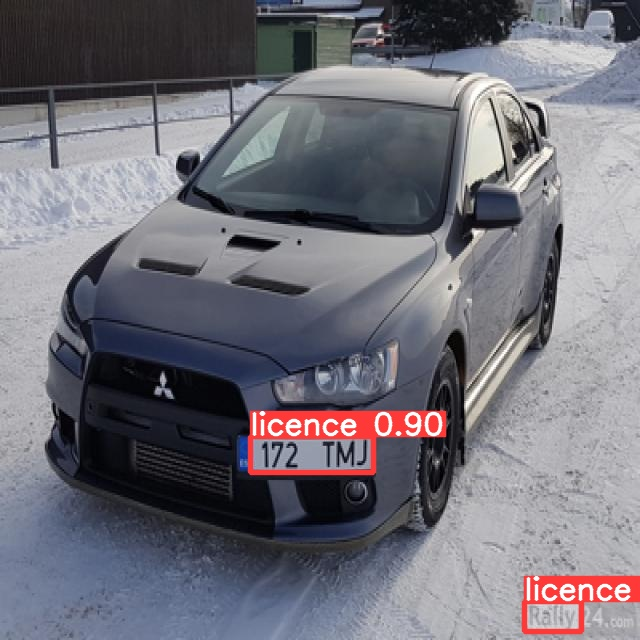

In [34]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [36]:
!ls {HOME}/yolov9/

ANPR2-8        data	  hubconf.py   README.md	 segment	  utils
benchmarks.py  detect.py  models       requirements.txt  train_dual.py	  val_dual.py
car.mp4        export.py  panoptic     runs		 train.py	  val.py
classify       figure	  __pycache__  scripts		 train_triple.py  val_triple.py


In [38]:
# video

!python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp_with_logs2/weights/best.pt --source car.mp4


detect: weights=['/content/yolov9/runs/train/exp_with_logs2/weights/best.pt'], source=car.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for

In [39]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 26.3 MB/s eta 0:00:00


In [46]:
!python anpr.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp_with_logs2/weights/best.pt --source car.mp4


anpr: weights=['/content/yolov9/runs/train/exp_with_logs2/weights/best.pt'], source=car.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `